<a href="https://colab.research.google.com/github/jinyingtld/python/blob/main/AI6103_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive 
drive.mount('/content/drive')

import os

os.chdir(r'/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab/')

Mounted at /content/drive


In [8]:
# uci.py

import numpy as np
import pandas as pd

def iris():
    path = 'datasets/iris.csv'
    names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
    df = pd.read_csv(path, names=names,index_col=False)
    df = df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2]).values
    x = df[:, :4].astype(np.float16)
    y = df[:, 4].astype(np.uint8)

    return x, y

def adult():
    path = 'datasets/adult.csv'
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
    df = pd.read_csv(path, names=names, index_col=False)
    df = df.applymap(lambda x: x.strip() if type(x) is str else x)

    for col in df:
        if df[col].dtype == 'object':
            df = df[df[col] != '?']

    replace = [
        ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay',
         'Never-worked'],
        ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th',
         '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'],
        ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent',
         'Married-AF-spouse'],
        ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty',
         'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving',
         'Priv-house-serv', 'Protective-serv', 'Armed-Forces'],
        ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'],
        ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],
        ['Female', 'Male'],
        ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)',
         'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland',
         'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador',
         'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia',
         'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'],
        ['>50K', '<=50K']
    ]

    for row in replace:
        df = df.replace(row, range(len(row)))
    
    df = df.values
    x = df[:, :14].astype(np.uint32)
    y = df[:, 14].astype(np.uint8)

    return x, y

def wine():
    path = 'datasets/wine.csv'
    names = ['label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
             'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
             'Proline']
    df = pd.read_csv(path, names=names, index_col=False).values
    x = df[:, 1:].astype(np.float16)
    y = df[:, 0].astype(np.uint8)

    return x, y

def car_eval():
    path = 'datasets/car_eval.csv'
    names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
    df = pd.read_csv(path, names=names, index_col=False)
    replace = [
        ['low', 'med', 'high', 'vhigh'],
        ['small', 'med', 'big'],
        ['low', 'med', 'high'],
        ['unacc', 'acc', 'good', 'vgood']
    ]

    for row in replace:
        df = df.replace(row, range(len(row)))

    df = df.replace({'doors': {'5more': 5}, 'persons': {'more': 6}})
    df.doors = df.doors.apply(lambda x: int(x) - 2)
    df.persons = df.persons.apply(lambda x: (int(x) // 2) - 1)
    df = df.values.astype(np.uint8)
    X = df[:, :6]
    y = df[:, 6]

    return X, y


In [19]:
# iris()
# adult()
# wine()
# car_eval()

# Multi-class classification

Softmax regression(aka multinomial logistic regresssion) is a generalisation of logistic regression that handles multi-class classification. when number of classes is 2, softmax regression reduces to logistic regression.

## Softmax function 
$\sigma(z) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$

where $K$ is number of classes.

\

<img src="https://miro.medium.com/max/4800/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" alt="drawing" width="300"/>

## UCI Datataset
1. [Iris](https://archive.ics.uci.edu/ml/datasets/Iris): Classify into 3 classes based on 4 attributes; 150 examples.
2. [Adult](https://archive.ics.uci.edu/ml/datasets/Adult): Classify whether income exceeds $50K/yr using 14 attributes; 48842 examples.
3. [Wine](https://archive.ics.uci.edu/ml/datasets/Wine): Classify 3 different cultivars based on 13 attributes; 178 examples.

## Content
1. Import libraries
2. Prepare dataset
3. Training hyperparameters
4. Dataloader
4. Model
5. Training
6. Visualisation 

In [20]:
from google.colab import drive 
drive.mount('/content/drive')
# modify the following path accordingly
%cd '/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab/'
%ls -lah './'
%ls '/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab/datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NTU_Course/AI6103/Python Examples/Logistic Regression Colab
total 72K
drwx------ 2 root root 4.0K Sep  4 04:45 datasets/
-rw------- 1 root root  64K Sep  4 04:42 LogisticRegression.ipynb
-rw------- 1 root root 3.2K Sep  4 04:44 uci.py
adult.csv  iris.csv  wine.csv


# Import libraries

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from uci import iris, adult, wine # these functions load the datasets as Pandas Dataframes
%matplotlib inline


# Prepare dataset 

In [13]:
# Dataset (choose from iris, adult or wine)
dataset = 'iris'
dataset_fn = {'iris': iris(), 'adult': adult(), 'wine': wine()}
X, y, df = dataset_fn[dataset]

df.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [14]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

# for simplicity, here we are splitting the data into the training set and the test set. Rigorous model selection requires splitting into three sets, training, validation, and test.
# To do that, apply train_test_split once again on X_train and y_train

print('Number of features: ', num_features)
print('Number of training examples: ', X_train.shape[0])
print('Number of testing examples : ', X_test.shape[0])

# Normalization to zero mean and unit standard deviation
print("before normalization: mean = " + str(X_train.sum(axis=0)) + " std = " + str(X_train.std(axis=0)))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print("after normalization: mean = " + str(X_train.sum(axis=0))+ " std = " + str(X_train.std(axis=0)))

# apply the feature-level mean and std from the training set 
X_test = scaler.transform(X_test)


Number of features:  4
Number of training examples:  105
Number of testing examples :  45
before normalization: mean = [616.5 319.2 393.8 126.1] std = [0.856  0.4524 1.795  0.763 ]
after normalization: mean = [ 0.00586  -0.00403  -0.003906  0.      ] std = [0.9985 1.     0.9995 0.997 ]


# Setting hyperparameters for training

In [15]:
batch_size = 16
num_epochs = 100
leaning_rate = 0.4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Current device:', device)

Current device: cuda


# Dataloader 

In [16]:
# Convert to pytorch tensor 
X_train_tensor = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train_tensor = torch.from_numpy(y_train).type(torch.LongTensor)
X_test_tensor = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test_tensor = torch.from_numpy(y_test).type(torch.LongTensor)

# Pytorch train and test sets
train = TensorDataset(X_train_tensor, y_train_tensor)
test = TensorDataset(X_test_tensor, y_test_tensor)

# Data loader 
train_loader = DataLoader(train, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size = batch_size, shuffle=False)
# You should always shuffle the training dataset.
# Insufficient shuffling leads to biased estimates of the gradient!
# Shuffling the test set does not affect performance. 

# Model 

In [17]:
class SoftmaxRegression(nn.Module):
    def __init__(self, num_features,num_classes):
        super().__init__()
        self.linear = nn.Linear(num_features, num_classes) # this is a fully connected layer

    def forward(self, x):
        out = self.linear(x) # the outputs are the logits. This is expected by CrossEntropyLoss
        return out


In [20]:
# Create model 
model = SoftmaxRegression(num_features, num_classes).to(device)
print('Model: ', model)
# Cross entropy loss
criterion = nn.CrossEntropyLoss().to(device)

# Optimizer 
# optimizer = torch.optim.SGD(model.parameters(), lr=leaning_rate)
# this is SGD without momentum.

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=leaning_rate)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 60, eta_min=0)
# Cosine decay for the learning rate

Model:  SoftmaxRegression(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)


# Training 

In [22]:
def train_func(model, optimizer, criterion, train_loader,device, epoch):
    train_loss_ = 0
    correct_train = 0
    total_train = 0

    for i, (train_samples, labels) in enumerate(train_loader):
        train_samples = train_samples.to(device)
        labels = labels.to(device)

        # Forward pass 
        outputs = model(train_samples)

        # Calculate softmax and cross entropy loss
        loss = criterion(outputs, labels)

        # Compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate train accuracy
        _, predicted = torch.max(outputs, dim=1)

        # Accumulate train loss and acc for monitoring
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum()
        train_loss_ += loss*labels.size(0)

    scheduler.step()
    # store train loss and acc
    train_loss = (train_loss_/total_train).item()
    train_acc = (correct_train/total_train).item()

    return train_loss, train_acc

In [23]:
def eval(model, criterion, test_loader, device):
    test_loss_ = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for test_samples, test_labels in test_loader:
            test_samples = test_samples.to(device)
            test_labels = test_labels.to(device)
            test_outputs = model(test_samples)
            loss = criterion(test_outputs, test_labels)
            _, test_predicted = torch.max(test_outputs, dim=1)

            # Accumulate test loss and acc for monitoring
            total_test += test_labels.size(0)
            correct_test += (test_predicted == test_labels).sum()
            test_loss_ += loss*test_labels.size(0)

        test_loss = (test_loss_/total_test).item()
        test_acc = (correct_test/total_test).item()

    return test_loss, test_acc


In [24]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(num_epochs):
    train_loss_, train_acc_ = train_func(model, optimizer, criterion, train_loader, device, epoch)
    test_loss_, test_acc_ = eval(model, criterion, test_loader, device)
    if epoch%5 == 0:
        print('Epoch: {}, Train loss: {:.4f}, Test loss: {:.4f}, Train acc: {:.4f}, \
        Test acc: {:.4f}'.format(epoch, train_loss_, test_loss_, train_acc_, test_acc_))
    train_loss.append(train_loss_)
    test_loss.append(test_loss_)
    train_acc.append(train_acc_)
    test_acc.append(test_acc_)

Epoch: 0, Train loss: 0.5736, Test loss: 0.3943, Train acc: 0.7143,         Test acc: 0.8444
Epoch: 5, Train loss: 0.0986, Test loss: 0.0729, Train acc: 0.9524,         Test acc: 0.9778
Epoch: 10, Train loss: 0.0770, Test loss: 0.0651, Train acc: 0.9619,         Test acc: 1.0000
Epoch: 15, Train loss: 0.0717, Test loss: 0.0618, Train acc: 0.9810,         Test acc: 0.9778
Epoch: 20, Train loss: 0.0681, Test loss: 0.0624, Train acc: 0.9714,         Test acc: 0.9778
Epoch: 25, Train loss: 0.0653, Test loss: 0.0532, Train acc: 0.9714,         Test acc: 1.0000
Epoch: 30, Train loss: 0.0646, Test loss: 0.0493, Train acc: 0.9714,         Test acc: 1.0000
Epoch: 35, Train loss: 0.0638, Test loss: 0.0516, Train acc: 0.9810,         Test acc: 1.0000
Epoch: 40, Train loss: 0.0629, Test loss: 0.0500, Train acc: 0.9810,         Test acc: 1.0000
Epoch: 45, Train loss: 0.0627, Test loss: 0.0483, Train acc: 0.9810,         Test acc: 1.0000
Epoch: 50, Train loss: 0.0624, Test loss: 0.0485, Train acc: 0

# Visualization

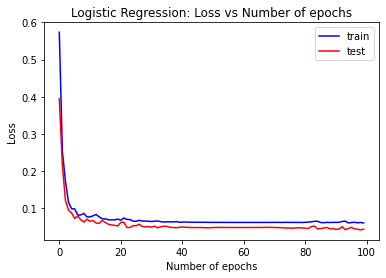

In [25]:
plt.plot(range(len(train_loss)), train_loss, 'b')
plt.plot(range(len(test_loss)), test_loss, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of epochs")
plt.legend(['train', 'test'])
plt.show()

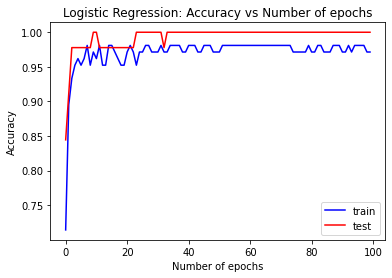

In [26]:
plt.plot(range(len(train_acc)), train_acc, 'b')
plt.plot(range(len(test_acc)), test_acc, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Accuracy vs Number of epochs")
plt.legend(['train', 'test'])
plt.show()

### References/Resources
1. https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/notebook
2. [Softmax activation](https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60)

# ResNet Tutorial

In [1]:
!nvidia-smi

Mon Feb 14 23:56:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
# import all libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse


In [29]:
# these are commonly used data augmentations
# random cropping and random horizontal flip
# lastly, we normalize each channel into zero mean and unit standard deviation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822, 0.4465),(0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',train=True,download=True,transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(
    root='./data',train=False,download=True,transform=transform_test)
# we can use a larger batch size during test, because we do not save intermediate variables for gradient computation, which leaves more memory
testloader = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Data Augmentation

Data augmentation performs random modifications of the image as a preprocessing step. It serves the following purposes:

1. It increases the amount of data for training
2. By deleting features, it prevents the network from relying on a narrow set of features, which may not generalize.
3. By changing features while maintaining the same output, it helps the network become tolerant of changes that do not change the image label.

In short, data augmentation desensitivizes the network, so it extract features that are invariant to changes that should not affect the prediction.

we showcase a few random data augmentation provided by PyTorch

In [30]:
! wget https://www.cesarsway.com/wp-content/uploads/2019/07/AdobeStock_197962036-1024x683.jpeg
! mv AdobeStock_197962036-1024x683.jpeg dog.jpg

--2022-02-14 14:35:27--  https://www.cesarsway.com/wp-content/uploads/2019/07/AdobeStock_197962036-1024x683.jpeg
Resolving www.cesarsway.com (www.cesarsway.com)... 104.22.31.81, 104.22.30.81, 172.67.12.103
Connecting to www.cesarsway.com (www.cesarsway.com)|104.22.31.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64141 (63K) [image/jpeg]
Saving to: ‘AdobeStock_197962036-1024x683.jpeg’

AdobeStock_19796203 100%[===================>]  62.64K  --.-KB/s    in 0.006s  

2022-02-14 14:35:29 (11.0 MB/s) - ‘AdobeStock_197962036-1024x683.jpeg’ saved [64141/64141]



In [31]:
!ls -l

total 143
drwx------ 3 root root  4096 Feb 14 14:27 data
drwx------ 2 root root  4096 Sep  4 04:45 datasets
-rw------- 1 root root 64141 Feb 10  2020 dog.jpg
-rw------- 1 root root 65386 Sep  4 04:42 LogisticRegression.ipynb
drwx------ 2 root root  4096 Feb 14 12:45 __pycache__
-rw------- 1 root root  3232 Sep  4 04:44 uci.py


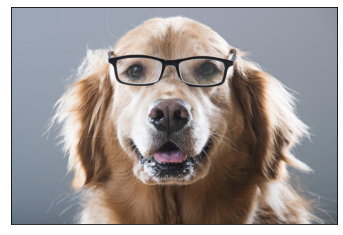

In [35]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.io import read_image

plt.rcParams['savefig.bbox'] = 'tight'
torch.manual_seed(1)

def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

dog1 = read_image('dog.jpg')
show([dog1])
# dog1 = read_image(str(Path('assets') / 'dog1.jpg'))
# dog2 = read_image(str(Path('assets') / 'dog2.jpg'))
# show([dog1, dog2])


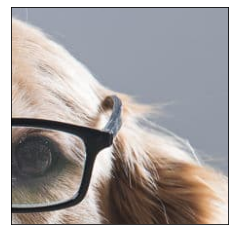

In [42]:
import torch.nn as nn
transforms = torch.nn.Sequential(
    T.RandomCrop(224), #randomly crop a 224x224 region from the image
    T.RandomHorizontalFlip(p=0.3), # with a given probability, perform horizontal flip
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dog1 = dog1.to(device)
# dog2 = dog2.to(device)

# transformed_dog1 = transforms(dog1)
transformed_dog1 = transforms(dog1)
show([transformed_dog1])

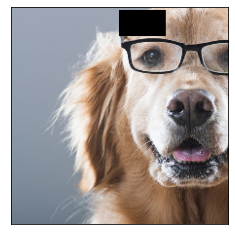

In [48]:
import torch.nn as nn
transforms = torch.nn.Sequential(
    T.Resize(256), # resize the short edge to 256
    T.RandomCrop(224), #randomly crop a 224x224 region from the image
    T.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False),
    # T.ColorJitter(brightness=0.3, contrast=0.2, saturation=0.1, hue=0.1),
    # T.AutoAugment()
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dog1 = dog1.to(device)
# dog2 = dog2.to(device)

# transformed_dog1 = transforms(dog1)
transformed_dog1 = transforms(dog1)
show([transformed_dog1])

See more examples at: https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [50]:
# Training 
def train(epoch, net, criterion, trainloader, scheduler):
    device = 'cuda'
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device),targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        if (batch_idx+1) % 50 == 0:
            print("iteration : %3d, loss : %0.4f, accuracy : %2.2f" % (batch_idx+1, train_loss/(batch_idx+1), 100.*correct/total))
    scheduler.step()
    return train_loss/(batch_idx+1), 100.*correct/total

Test performance on the test set. Note the use of `torch.inference_mode()`

In [51]:
def test(epoch, net, criterion, testloader):
    device = 'cuda'
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.inference_mode():
        for batch_idx, (inputs, target) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return test_loss/(batch_idx+1), 100.*correct/total

In [52]:
def save_checkpoint(net, acc, epoch):
    # Save checkpoint.
    print('Saving..')
    state = {
        'net': net.state_dict(),
        'acc': acc,
        'epoch': epoch,
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/ckpt.pth')

In [53]:
# defining resNet models

class BasicBlock(nn.Module):
    expansion = 1  

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,stride=1, padding=1,bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,kernel_size=1, stride=stride,bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
        
    def forward(self,x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck,self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion * planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                            kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # This is the "stem"
        # For CIFAR (32x32 images), it does not perform downsampling 
        # It should downsample for ImageNet
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        # four stages with three downsampling
        self.layer1 = self._make_layer(block, 64, num_blocks[0],stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1],stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2],stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3],stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])

def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])

def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])

def test_resnet18():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())


In [55]:
# main body
config = {
    'lr': 0.01,
    'momentum': 0.9,
    'weight_decay': 5e-4
}


net = ResNet18().to('cuda')
criterion = nn.CrossEntropyLoss().to('cuda')
optimizer = optim.SGD(net.parameters(), lr=config['lr'],
                      momentum=config['momentum'], weight_decay=config['weight_decay'])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

for epoch in range(1, 200):
    train_loss, train_acc = train(epoch, net, criterion, trainloader, scheduler)
    test_loss, test_acc = test(epoch, net, criterion, testloader)
    
    print(("Epoch : %3d, training loss : %0.4f, training accuracy : %2.2f, test loss " + \
      ": %0.4f, test accuracy : %2.2f") % (epoch, train_loss, train_acc, test_loss, test_acc))


Epoch: 1
iteration :  50, loss : 1.9709, accuracy : 26.12
iteration : 100, loss : 1.8143, accuracy : 32.72
iteration : 150, loss : 1.7173, accuracy : 36.52
iteration : 200, loss : 1.6430, accuracy : 39.66
iteration : 250, loss : 1.5719, accuracy : 42.39
iteration : 300, loss : 1.5133, accuracy : 44.64
iteration : 350, loss : 1.4632, accuracy : 46.59


UnboundLocalError: ignored